In [57]:
import sympy as sp
import matplotlib.pyplot as plt

In [58]:
x = sp.symbols('x')

In [59]:
expr = (x**2+7)**5
expr.diff().diff().factor()

10*(x**2 + 7)**3*(9*x**2 + 7)

### 5. Derivative

In [60]:
t = sp.symbols('t')
expr = t**4 *sp.tan(3.5*t)
expr.diff().simplify()

t**3*(3.5*t/cos(3.5*t)**2 + 4*tan(3.5*t))

In [61]:
expr = (7*x+5)/(x**2 +4*x +2)
expr.diff().simplify().factor()

-(7*x**2 + 10*x + 6)/(x**2 + 4*x + 2)**2

In [62]:
expr = (2*x+1)**-5
expr.diff().simplify()

-10/(2*x + 1)**6

In [63]:
expr = (5*x**2 +2)*(2*x -5)
expr.diff().simplify()

30*x**2 - 50*x + 4

In [64]:
expr = 3*x**3-11*x**2+35*x+3
expr.diff()

9*x**2 - 22*x + 35

In [65]:
expr = (9*x+7)/(x**2+4*x+3)
expr

(9*x + 7)/(x**2 + 4*x + 3)

In [66]:
expr.diff().simplify()

(9*x**2 + 36*x - 2*(x + 2)*(9*x + 7) + 27)/(x**2 + 4*x + 3)**2

In [67]:
expr.diff().expand().simplify().factor()

-(9*x**2 + 14*x + 1)/((x + 1)**2*(x + 3)**2)

In [68]:
def quotient_rule(expr, wrt=x):
    numer, denom = expr.as_numer_denom()
    d_numer = numer.diff(wrt)
    d_denom = denom.diff(wrt)
    top = d_numer*denom - d_denom*numer
    bottom = denom**2
    return sp.simplify(top.expand())/bottom

quotient_rule(expr)

(-9*x**2 - 14*x - 1)/(x**2 + 4*x + 3)**2

### 1. Second derivative

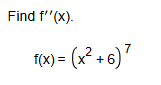

In [69]:
expr = (x**2+6)**7
expr.diff(x, 2)

14*(x**2 + 6)**5*(13*x**2 + 6)

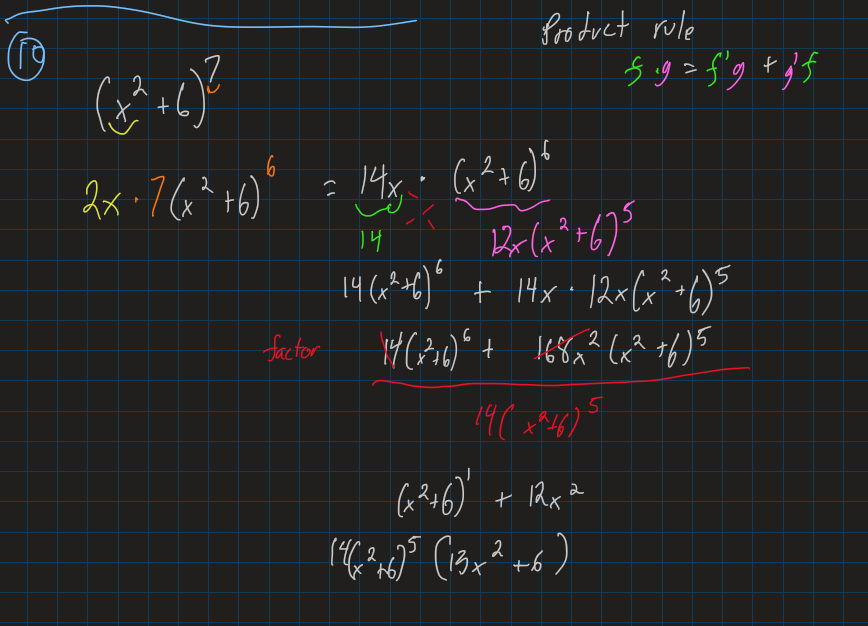

In [70]:
#12
expr = x**4 * sp.tan(1.5*x)
expr.diff().factor()

4.0*x**3*(0.375*x*tan(1.5*x)**2 + 0.375*x + 1.0*tan(1.5*x))

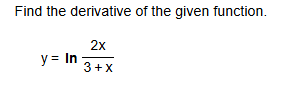

In [71]:
f = sp.Function('f')
g = sp.Function('g')
h = sp.Function('h')
l = sp.Function('l')

In [72]:
expr = h(x)/l(x)
expr.diff()

-h(x)*Derivative(l(x), x)/l(x)**2 + Derivative(h(x), x)/l(x)

In [73]:
expr.diff().simplify()

(-h(x)*Derivative(l(x), x) + l(x)*Derivative(h(x), x))/l(x)**2

In [74]:
quotient_rule(expr)*expr**-1

(-h(x)*Derivative(l(x), x) + l(x)*Derivative(h(x), x))/(h(x)*l(x))

In [75]:
f(expr).diff().simplify()

(-h(x)*Derivative(l(x), x) + l(x)*Derivative(h(x), x))*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, h(x)/l(x))/l(x)**2

In [76]:
expr = (6*x)/(3+x)
quotient_rule(expr)*expr**-1

3/(x*(x + 3))

In [77]:
expr = sp.log(expr)
expr.diff().simplify()

3/(x*(x + 3))

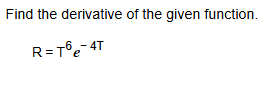

In [78]:
a,b = sp.symbols('a, b')
e = sp.E

In [79]:
expr = e**(a*x)
expr.diff(x)

a*exp(a*x)

In [80]:
t = sp.symbols('t')
expr = t*e**(-5*t)
expr

t*exp(-5*t)

In [81]:
expr.diff()

-5*t*exp(-5*t) + exp(-5*t)

### 15. Newton's Method

In [82]:
def newton_method(expr, x0, wrt=x, tol=1e-6, max_iter=20, print_steps=True):
    # Start with finding the derivative of our expression
    d_expr = expr.diff(wrt) 
    # Convert both into numerical functions
    f = sp.lambdify(wrt, expr)
    df = sp.lambdify(wrt, d_expr)
    
    xi = x0 # Start with current guess
    for i in range(max_iter):
        yi = f(xi)  # Current y-value
        mi = df(xi) # Current slope
        # We need to make sure slope is not 0
        if mi == 0:
            raise ZeroDivisionError("Derivative is zero. No convergence.")
        # Find the x-intercept of the tangent line
        x_intercept = xi - yi/mi
        # The x-intercept is closer to the root so it becomes the next guess
        x_next = x_intercept

        if print_steps:
            print(f"Step {i+1}: x = {x_next}")

        # Check how much our guess improved
        if abs(x_next - xi) < tol:
            if print_steps:
                print(f"Root ≈ {x_next}")
            return x_next
        
        xi = x_next # Set the guess for next loop

    # If loop runs fully, failed to converge
    raise RuntimeError("Newton's method did not converge.")

In [83]:
expr = 5*x**3 - 7*x**2 -x -1
newton_method(expr, 1.5)

Step 1: x = 1.6170212765957448
Step 2: x = 1.6028861207962761
Step 3: x = 1.6026587079346704
Step 4: x = 1.6026586495295585
Root ≈ 1.6026586495295585


1.6026586495295585

### 16. Local Maxima/Minima

-(x - 4)*(3*x + 2)

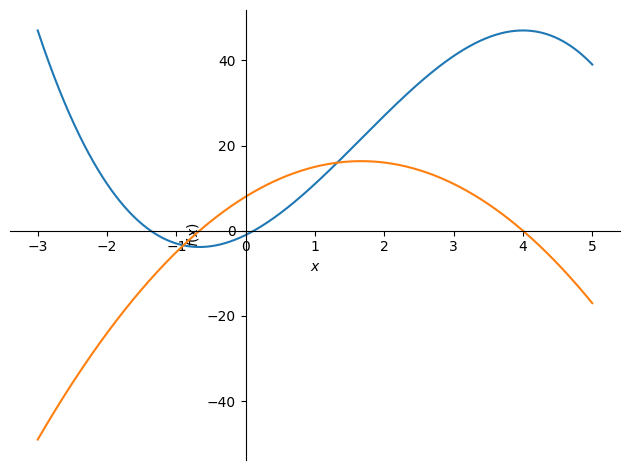

(-2/3, -103/27)
(4, 47)


In [84]:
expr = -x**3 +5*x**2 +8*x -1
display(expr.diff().factor())
# We want to know when the slope = 0
plot = sp.plot(expr, expr.diff(), (x, -3, 5))
ax = plot._backend
for sol in sp.solve(expr.diff().factor(), x):
    print(f"({sol}, {expr.subs(x, sol)})")

### 17. Displacement > Velocity

In [85]:
ti = 3e-3
expr = 3*sp.sin(183*t)*sp.cos(183*t)
expr.diff().subs(t, ti)

250.002317643250

### 18. Tangent Line

In [86]:
# Find expression of tangent line at x = 5
expr = sp.Rational(1,3)*sp.atan(sp.Rational(1,5)*x)
xi = 5
display(expr , expr.subs(x, xi))

atan(x/5)/3

pi/12

In [87]:
slope = expr.diff().subs(x,xi)
slope

1/30

In [88]:
y_val = expr.subs(x, xi)
y_intercept =  y_val - slope*xi
y_intercept

-1/6 + pi/12

In [89]:
tangent_line = slope*x + y_intercept.together()
tangent_line.simplify().together()

(2*x - 10 + 5*pi)/60

In [90]:
sp.latex(tangent_line)

'\\frac{x}{30} + \\frac{-2 + \\pi}{12}'

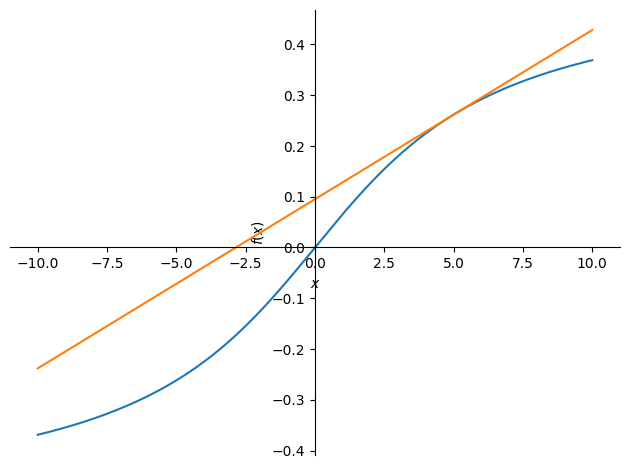

In [91]:
sp.plot(expr, tangent_line)

In [92]:
# Find expression of tangent line at x = 5
expr = sp.Rational(1,3)*sp.atan(sp.Rational(1,3)*x)
xi = 3
display(expr , expr.subs(x, xi))

atan(x/3)/3

pi/12

In [93]:
def get_tangent_at(expr, loc, wrt=x):
    slope = expr.diff(wrt).subs(wrt, loc)
    y_val = expr.subs(wrt, loc)
    y_intercept =  y_val - slope*loc
    tangent_line = slope*wrt + y_intercept
    return tangent_line

get_tangent_at(expr, xi).together()

(2*x - 6 + 3*pi)/36

### Normal Line

In [94]:
expr = 2*sp.sin(sp.Rational(1,2)*x)
xi = 3*sp.pi/2
display(expr , expr.subs(x, xi), xi)

2*sin(x/2)

sqrt(2)

3*pi/2

In [95]:
def get_normal_at(expr, loc, wrt=x):
    slope = expr.diff(wrt).subs(wrt, loc)
    slope = -1/slope # Inverse reciprocal of
    y_val = expr.subs(wrt, loc)
    y_intercept =  y_val - slope*loc
    normal_line = slope*wrt + y_intercept
    return normal_line

get_normal_at(expr, xi)

sqrt(2)*x - 3*sqrt(2)*pi/2 + sqrt(2)

In [96]:
get_normal_at(expr, xi).simplify()

sqrt(2)*(x - 3*pi/2 + 1)

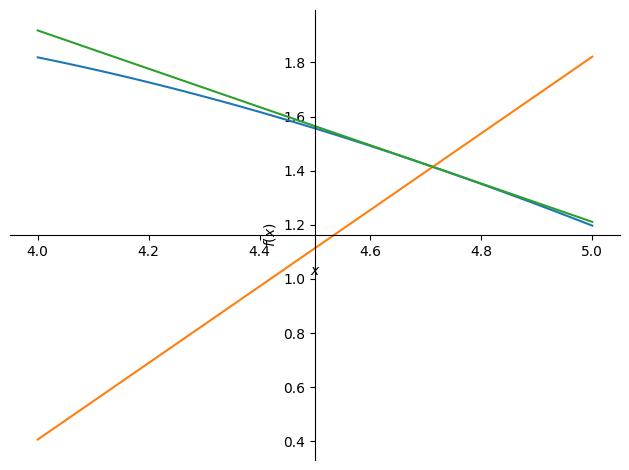

In [97]:
plot = sp.plot(expr, get_normal_at(expr,xi), get_tangent_at(expr,xi), (x, 4, 5), show=False)
plot.aspect_ratio=(1,1)
plot.show()

### Approximation with linearization

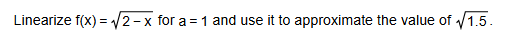

In [98]:
expr = sp.sqrt(2-x)
a = 1

In [99]:
fa = expr.subs(x, a)
slope = expr.diff().subs(x, a)
lx = fa+ slope*(x-a)
lx.together()

(3 - x)/2

3/2 - x/2

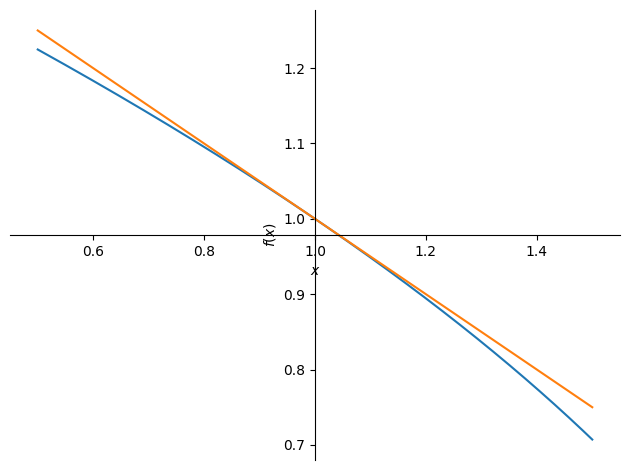

In [100]:
tangent_line = get_tangent_at(expr, a)
display(tangent_line)
sp.plot(expr, tangent_line, (x, .5, 1.5))

In [101]:
tangent_line.subs(x, 2-1.8)

1.40000000000000

In [102]:
tangent_line.subs(x, sp.Rational(1,2))

5/4

In [103]:
sp.sqrt(1.5)

1.22474487139159

example

In [104]:
expr = sp.sqrt(9-x)
a = 5
tangent_line = get_tangent_at(expr, a)
display(tangent_line)
tangent_line.subs(x, 9-2.1)

13/4 - x/4

1.52500000000000

### 20. L'Hospital's rule
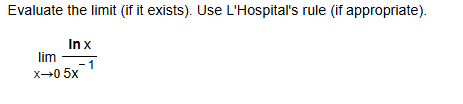

AI Overview  
L'Hôpital's Rule is a method used in calculus to evaluate limits of indeterminate forms, specifically those of the form 0/0 or ∞/∞. It states that if the limit of a quotient of two functions results in one of these indeterminate forms, then the limit of the quotient is equal to the limit of the quotient of their derivatives, provided the latter limit exists. 

In [105]:
numer = sp.ln(x)
denom = x**-1
expr = numer/denom

In [106]:
# It's a bit hard to demo this with sympy with this expression
# But if we take the limits as x approaches 0 of each part of the quotient seperately we arrive at the indeterminate form
display(numer.limit(x, 0))
display(denom.limit(x, 0))

-oo

oo

In [107]:
# But we can use L'Hopital's rule and instead take the limit of the quotient of their derivatives
display(numer.diff()/denom.diff())
display((numer.diff()/denom.diff()).limit(x,0))

-x

0

In [108]:
# Which we can confirm with sympy by taking the limit of the original expression
expr.limit(x, 0)

0

### Find specific slope

In [109]:
expr = 5*x**2
mtan = 50
sol = sp.solve(expr.diff()-mtan, x)
for s in sol:
    print(f"({s}, {expr.subs(x, s)})")

(5, 125)


### Implicit diff

In [110]:
# Note: This is typically easier to do by hand
x, y = sp.symbols('x, y')
def implicit_diff(expr, wrt=x, solve_for=y, return_dict=False):
    # Treat every variable as a function of a single variable (which is implied)
    funcs = {}
    syms = {}
    for var in expr.free_symbols:
        func = sp.Function(str(var))(wrt)
        funcs[var] = func
        syms[func] = var
    expr_funcs = expr.subs(funcs)
    # Differentiate the entire thing with respect to your variable
    diff_expr_funcs = expr_funcs.diff(wrt)
    # Solve for the derivative that you want
    solution = sp.solve(diff_expr_funcs, funcs[solve_for].diff())
    
    if return_dict:
        output = {
            'solution': solution,
            'functions': funcs,
            'symbols': syms,
        }
        return output
    else:
        return solution
    
# Demo
expr = x**2-y**2-1
t = sp.symbols('t') # wrt does not need to be in the expression
implicit_diff(expr, x, y)[0]

x(x)*Derivative(x(x), x)/y(x)

In [111]:
sp.solve(expr, y)[1].diff()

x/sqrt(x**2 - 1)